In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [164]:
new_macro = pd.read_csv('../Github/Data/Processed/New_Macro_Kalman.csv', header = [0], index_col=[0], parse_dates=True)

ffr_df = pd.read_csv('../Github/Data/calculated_macro.csv', header = [0], index_col=[0], parse_dates=True)[['Mid Price']]

In [165]:
df = pd.concat([ffr_df, new_macro], axis = 1)
df = df.rename({'Mid Price': 'FFR'}, axis = 1)
start_date = pd.to_datetime('1989-10-01')
df = df[start_date:]
df['Traditional'] = (2 + (df['PCE'] - 2)/2 + 0.5 * 100 * (df['RGAP'])).shift(2)

In [166]:
df_copy = df.copy()
df_copy = df_copy[['PCE', 'RGAP', 'Level', 'Slope', 'Curvature']].shift(2)
df_copy = pd.concat([df[['FFR']], df_copy], axis = 1)
df_copy = df_copy.dropna(how = 'any')
df_copy = df_copy.drop(pd.to_datetime('2023-10-01'))

In [167]:
df_copy.iloc[len(df_copy) - 12 - 1: len(df_copy) - 1]

,FFR,PCE,RGAP,Level,Slope,Curvature
2020-07-01,0.08,1.538333,0.066473,0.014181,-0.004576,0.000270
2020-10-01,0.09,0.539667,-0.019995,-0.009926,-0.003267,-0.000134
2021-01-01,0.09,1.145000,0.051079,-0.009183,-0.002970,0.000981
2021-04-01,0.07,1.262667,0.057142,-0.052665,-0.000987,-0.000929
2021-07-01,0.08,2.162000,0.065404,0.013271,-0.002815,-0.000318
2021-10-01,0.08,4.246333,0.075649,0.011925,0.005010,-0.000319
2022-01-01,0.08,4.886000,0.078713,-0.023566,0.002245,0.003416
2022-04-01,0.20,6.171333,0.090462,0.090801,0.003366,-0.001732
2022-07-01,1.21,7.012667,0.080480,0.093093,-0.013144,-0.000167
2022-10-01,2.56,7.368667,0.074295,0.139221,0.006914,0.000274


In [168]:
variables = ['PCE', 'RGAP', 'Level']

min_data_points = 12

results = []
predictions = []

for i in range(min_data_points, len(df_copy)):
    window_data = df_copy.iloc[i - min_data_points:i]
    
    X = sm.add_constant(window_data[variables])
    y = window_data['FFR']
    
    model = sm.OLS(y, X)
    result = model.fit()
    p_values = result.pvalues
    print(p_values)
    
    results.append({
        'End Date': window_data.index[-1],
        'Intercept': result.params[0],
        'Coefficients': result.params[1:],
        'R-squared': result.rsquared
    })
    # print('Yes')
    # print(result.predict([1] + list(df_copy.loc[df_copy.index[i], variables])))
    
    next_prediction = result.predict([1] + list(df_copy.loc[df_copy.index[i], variables]))[-1]
    predictions.append(next_prediction)

result_df = pd.DataFrame(results)
# print(result_df)

predictions = pd.DataFrame(predictions, index = df_copy.index[12:], columns = ['Predicted'])
predictions[predictions < 0] = 0

const    0.090369
PCE      0.056303
RGAP     0.010113
Level    0.703931
dtype: float64
const    0.098068
PCE      0.034103
RGAP     0.044602
Level    0.616460
dtype: float64
const    0.160231
PCE      0.018105
RGAP     0.159611
Level    0.749191
dtype: float64
const    0.736463
PCE      0.000766
RGAP     0.689541
Level    0.386208
dtype: float64
const    2.011591e-04
PCE      1.557046e-07
RGAP     2.773426e-05
Level    8.157089e-01
dtype: float64
const    0.062670
PCE      0.001633
RGAP     0.006427
Level    0.183935
dtype: float64
const    0.290459
PCE      0.534432
RGAP     0.330586
Level    0.464861
dtype: float64
const    0.021123
PCE      0.077336
RGAP     0.241833
Level    0.180773
dtype: float64
const    0.024040
PCE      0.024852
RGAP     0.360527
Level    0.095659
dtype: float64
const    0.380176
PCE      0.201957
RGAP     0.061185
Level    0.114664
dtype: float64
const    0.410111
PCE      0.857983
RGAP     0.001135
Level    0.139186
dtype: float64
const    0.109847
PCE      

const    0.000333
PCE      0.039265
RGAP     0.019261
Level    0.398017
dtype: float64
const    0.000417
PCE      0.615021
RGAP     0.000364
Level    0.793217
dtype: float64
const    0.002391
PCE      0.907509
RGAP     0.000569
Level    0.748507
dtype: float64
const    0.012900
PCE      0.914406
RGAP     0.002950
Level    0.699229
dtype: float64
const    0.051079
PCE      0.944736
RGAP     0.011604
Level    0.399553
dtype: float64
const    0.836651
PCE      0.426726
RGAP     0.306509
Level    0.028575
dtype: float64
const    0.726038
PCE      0.146096
RGAP     0.146975
Level    0.018967
dtype: float64
const    0.683053
PCE      0.050263
RGAP     0.156497
Level    0.178760
dtype: float64
const    0.344263
PCE      0.035027
RGAP     0.033503
Level    0.235753
dtype: float64
const    0.042281
PCE      0.001950
RGAP     0.000094
Level    0.145666
dtype: float64
const    0.003838
PCE      0.001185
RGAP     0.000055
Level    0.159468
dtype: float64
const    0.000572
PCE      0.000306
RGAP   

In [169]:
comparison = pd.concat([df_copy[['FFR']].iloc[12:, :], predictions], axis = 1)

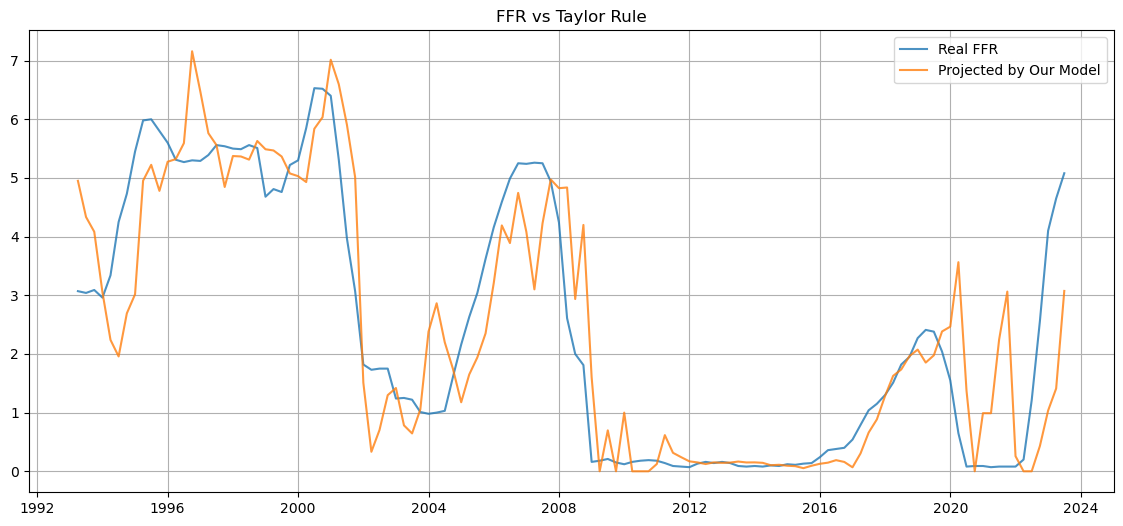

In [170]:
plt.figure(figsize=(14, 6))
plt.plot(comparison['FFR'], alpha = 0.8, label = 'Real FFR')
plt.plot(comparison['Predicted'], alpha = 0.8, label = 'Projected by Our Model')

plt.grid()
plt.title('FFR vs Taylor Rule')
plt.legend()
plt.show()

In [171]:
mse = np.mean((comparison['FFR'] - comparison['Predicted'][12:])**2)
print(mse)

1.060023644848738
